# В этом ноутбуке мы опробуем разные библиотеки и подходы к визуализации данных, в числе которых:

1.Matplotlib - самый базовый и встроенный в кучу более высокоуровневых пакетов инструментов

2.Seaborn - обертка над Matplotlib, упрощающая многие операции и по дефолту более симпатичная

3.Plotly - web-based плоттер с удобным python-API

4.Бонус: cufflinks - функционал Plotly напрямую в Pandas

## Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')

In [2]:
# matplotlib notebook
%matplotlib inline

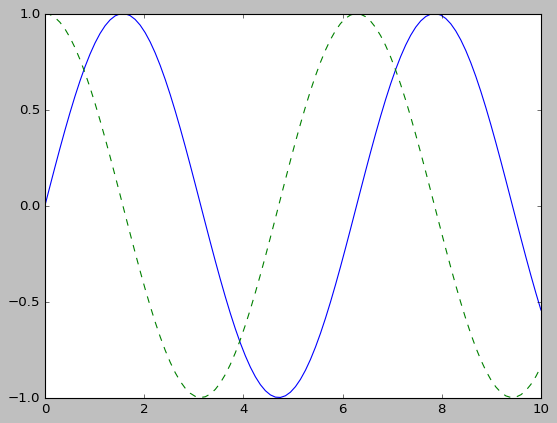

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [4]:
fig.savefig('my_figure.png')

In [5]:
!ls -lh my_figure.png

-rw-r--r--  1 pushistik  staff    38K Nov 23 01:52 my_figure.png


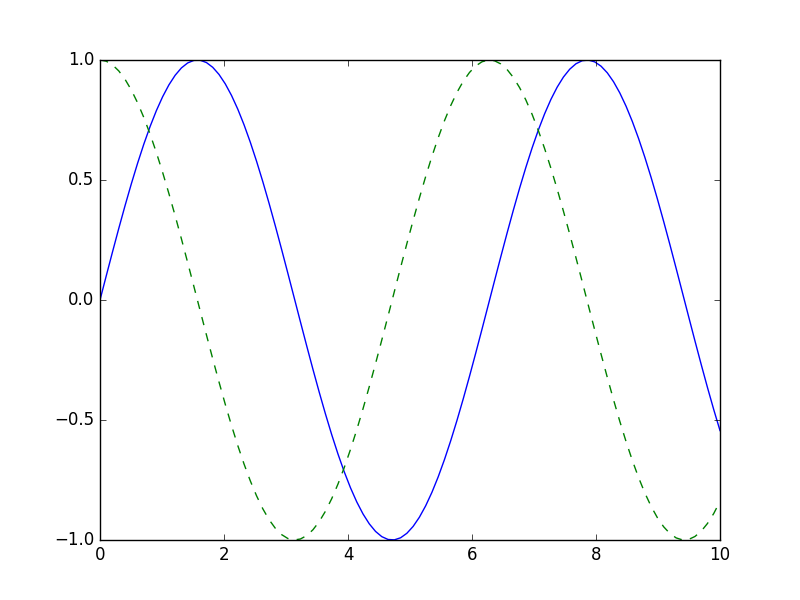

In [6]:
from IPython.display import Image
Image('my_figure.png')

## Seaborn

In [7]:
import matplotlib as mpl
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [8]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

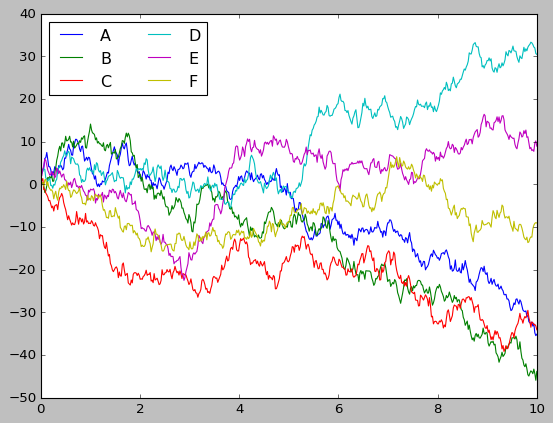

In [9]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [14]:
import seaborn as sns
sns.set()

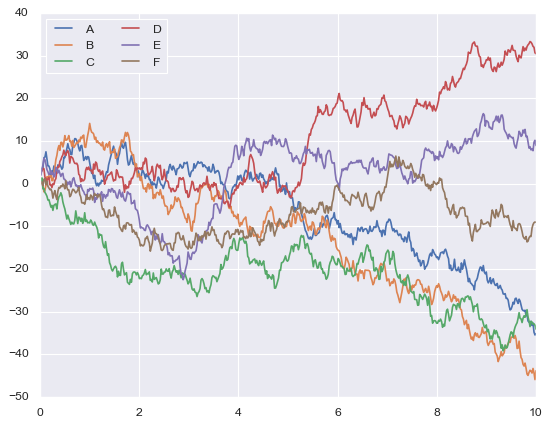

In [15]:
# Same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

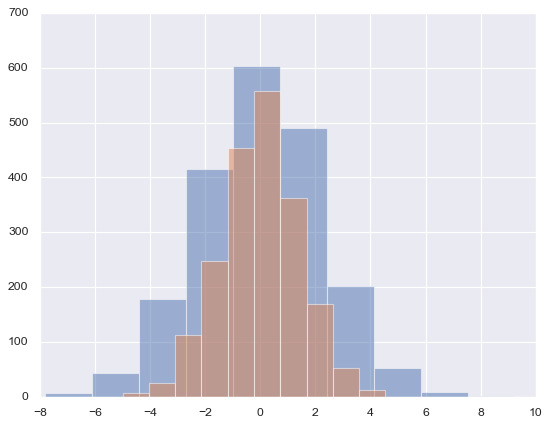

In [16]:
data = np.random.multivariate_normal([0, 0], [[5,2], [2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

<Axes: ylabel='Density'>

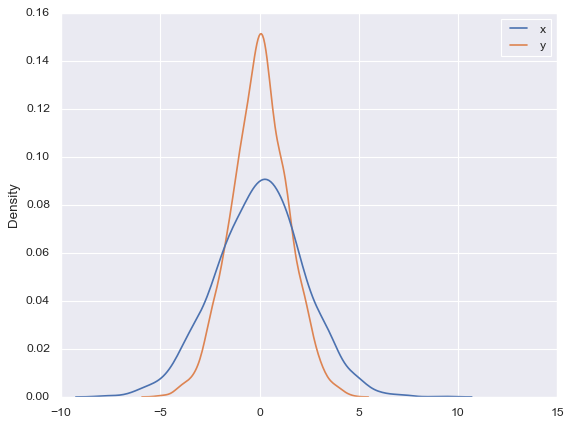

In [17]:
sns.kdeplot(data=data)

In [18]:
penguins = sns.load_dataset("penguins")

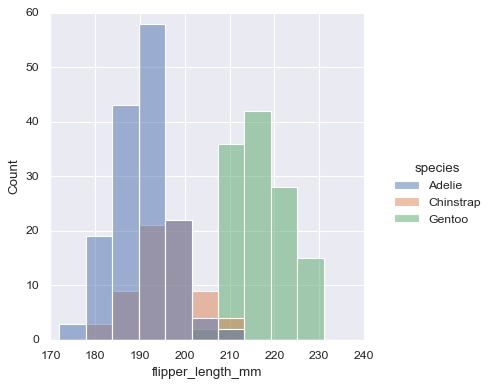

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

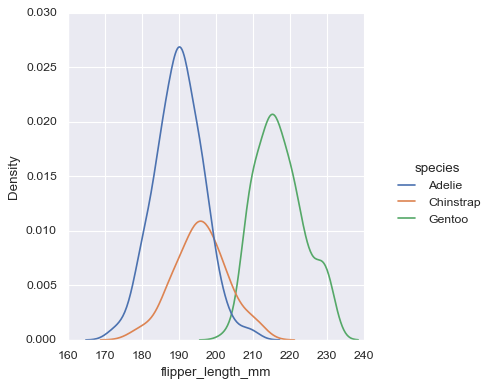

In [21]:
#kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

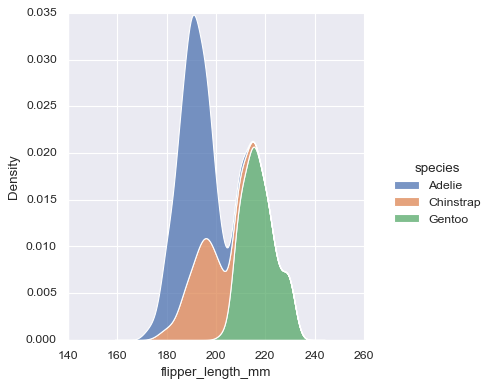

In [22]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

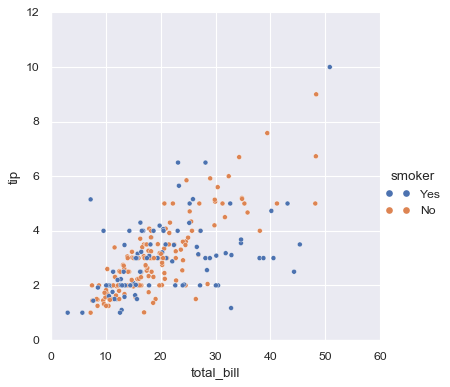

In [23]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

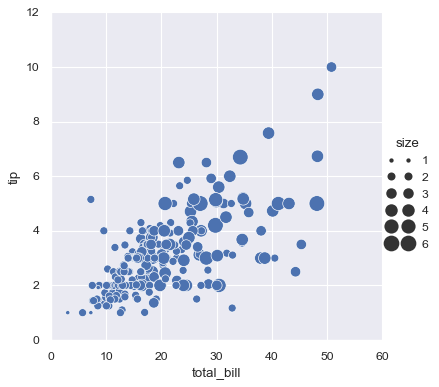

In [24]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

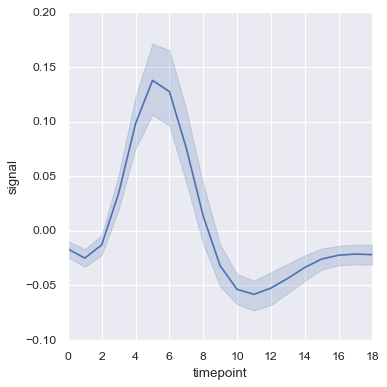

In [25]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

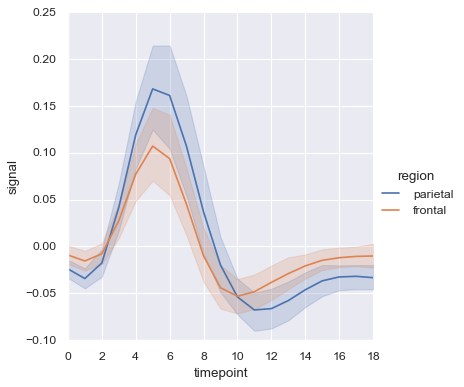

In [26]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region"
)

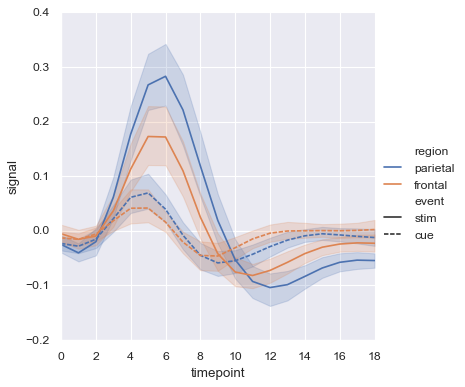

In [27]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event"
)

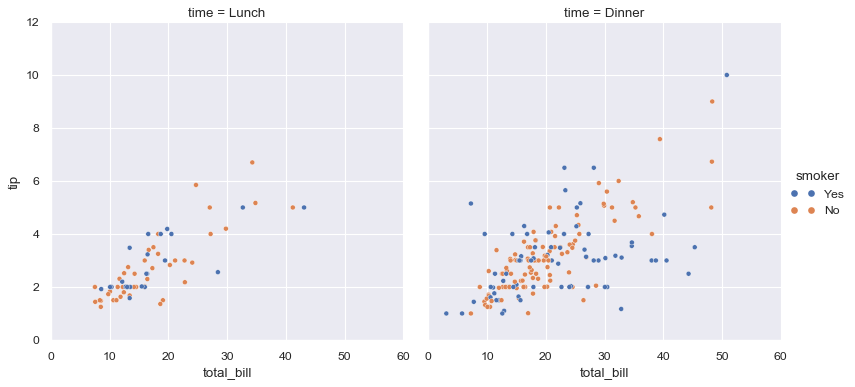

In [28]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time"
)

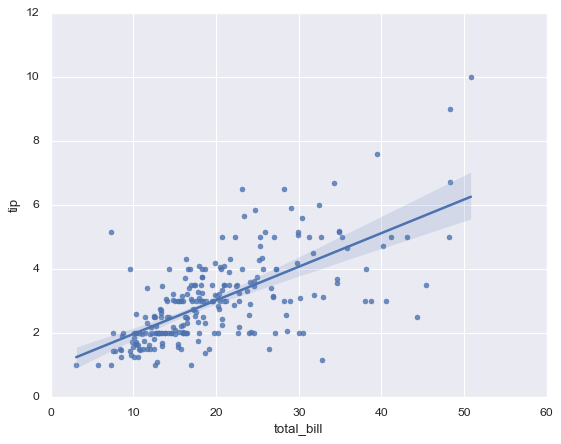

In [29]:
sns.regplot(x="total_bill", y="tip", data=tips);

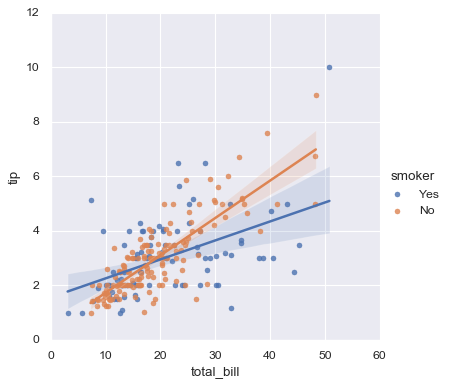

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

## Plotly

In [31]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 8.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 8.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 7.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                size="petal_length", hover_data=['petal_width'])
fig.show()

In [40]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

In [41]:
import statsmodels
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

In [42]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x="year", y="lifeExp", color="country", symbol="country")
fig.show()

In [43]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) - 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) + 5

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                        mode='markers',
                        name='markers'
                        ))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                        mode='lines+markers',
                        name='lines+markers'
                        ))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                        mode='lines',
                        name='lines'
                        ))

fig.show()

In [44]:
t = np.linspace(0, 10, 100)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t, y=np.sin(t),
    name='sin',
    mode='markers',
    marker_color='rgba(152, 0, 0, 0.8)'
))
fig.add_trace(go.Scatter(
    x=t, y=np.cos(t),
    name='cos',
    marker_color='rgba(255, 182, 193, 0.9)'
))    

# Set options common in all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Styled Scatter',
                 yaxis_zeroline=False, xaxis_zeroline=False)

fig.show()

In [45]:
import pandas as pd
data = pd.read_csv('http://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')
fig = go.Figure(data=go.Scatter(x=data['Postal'],
                               y=data['Population'],
                               mode='markers',
                               marker_color=data['Population'],
                               text=data['State'])) #hover text goes here
fig.update_layout(title='Population of USA States')
fig.show()

In [46]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

## Cufflinks - Plotly + Pandas

In [47]:
!pip3 install cufflinks

In [48]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [49]:
import cufflinks as cf
cf.go_offline()

In [50]:
import numpy as np

In [55]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.iplot(kind='scatter', x='year', y='lifeExp', categories='country')

/Users/arinasapogova/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/arinasapogova/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [56]:
cf.datagen.lines(2).head()

,KSK.IZ,ERS.RW
2015-01-01,0.531164,0.004001
2015-01-02,0.852430,-0.721214
2015-01-03,2.388966,-0.721589
2015-01-04,3.682516,-1.160587
2015-01-05,4.272555,-1.839971


In [57]:
cf.datagen.lines(2).iplot(kind='spread', xTitle='Dates', yTitle='Return', title='Cufflinks - Spread Chart')

/Users/arinasapogova/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/arinasapogova/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

